<a href="https://colab.research.google.com/github/Ksarony/Categorize-Musics-with-PCA-and-K-Means-Clustering/blob/main/SaronyClusterSpotify.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Categorizing Music with PCA and K-Means Clustering**

Clustering and dimensionality reduction are essential techniques in today's data-driven world. With the massive amount of data being generated every day, clustering and dimensionality reduction techniques play a crucial role in helping to analyze and understand complex data.

**Clustering**

“Clustering” is the process of grouping similar entities together. The goal of this unsupervised machine learning technique is to find similarities in the data point and group similar data points together.Grouping similar entities together help profile the attributes of different groups. In other words, this will give us insight into underlying patterns of different groups. There are many applications of grouping unlabeled data, for example, you can identify different groups/segments of customers and market each group in a different way to maximize the revenue. There are various clustering algorithms, each with its own strengths and weaknesses. Some of the most popular clustering algorithms include k-means, hierarchical clustering, DBSCAN, and Gaussian mixture models. The choice of clustering algorithm depends on the type of data, the number of clusters desired, and the goals of the analysis. Clustering can be evaluated using measures such as silhouette score, elbow method, and gap statistic.

**Principal Component Analysis for Dimensionality Reduction**

Dimension reduction is a technique used in machine learning and data analysis to reduce the number of variables or features in a dataset while retaining most of the information. The goal of dimension reduction is to simplify the data, make it easier to visualize and interpret, and improve the performance of machine learning algorithms by reducing the noise and redundancy in the data.

PCA is a linear dimensionality reduction technique that converts a set of correlated features in the high-dimensional space into a series of uncorrelated features in the low-dimensional space. These uncorrelated features are also called principal components. PCA is an orthogonal linear transformation which means that all the principal components are perpendicular to each other. It transforms the data in such a way that the first component tries to explain the maximum variance from the original data. It is an unsupervised algorithm i.e. it does not take into consideration the class labels.PCA works by finding the eigenvectors and eigenvalues of the covariance matrix of the original data. The eigenvectors represent the directions of maximum variance in the data, while the eigenvalues represent the amount of variance explained by each eigenvector. The eigenvectors and eigenvalues are used to compute the principal components, which are linear combinations of the original variables.

PCA has many applications in data analysis, including data compression, visualization, feature extraction, and data pre-processing. By reducing the number of features in the data, PCA can help to speed up machine learning algorithms, improve the accuracy of predictions, and reduce overfitting. However, it is important to note that PCA may not always be the best choice for dimension reduction, and other methods such as independent component analysis (ICA) or t-SNE may be more appropriate for certain types of data.

**Project Overview**

With rising diversity in music we can not separate music just based on their genre. It needs more to features to choose a song of one's choice. The Spotify feature dataset certainly helps us to get desirable songs according to one's choices. Clustering and dimension reduction help us to identify specific song lists to suggest clients based on the features. It also gives you access to information that is not available on the app, such as danceability’, ‘valence’, ‘tempo’, ‘liveness’, ‘speechiness’.

Clustering and Principal Component Analysis (PCA) can be used to choose a desirable song list based on audio features dataset in the following ways:

**Clustering**: Clustering can group songs with similar audio features together, making it easier to create a playlist that has a specific theme or mood. For example, using clustering, we can group songs with similar tempo, key, and rhythm, and create a playlist that has a consistent vibe. Additionally, clustering can help identify outlier songs that may not fit with the theme of the playlist.

**PCA**: PCA can reduce the dimensionality of the audio features dataset and identify the most important features that contribute to the variability of the songs. By reducing the number of features, we can make it easier to visualize and understand the relationships between different songs. This can help in identifying the most important audio features that contribute to the mood of the songs, such as tempo, key, and melody.

**Combined approach**: A combined approach using clustering and PCA can provide a more comprehensive analysis of the audio features dataset. By first reducing the dimensionality of the dataset using PCA, we can then apply clustering to group songs based on their similar audio features. This can help identify subgroups of songs with specific moods or themes, which can then be used to create playlists that are tailored to a specific audience.

Overall, using clustering and PCA can help in choosing a desirable song list based on audio features dataset by identifying groups of songs with similar characteristics, reducing the dimensionality of the dataset, and providing a more comprehensive analysis of the data.

**Data Acquisition via Spotify API**

Spotify uses a series of different features to classify the tracks. The descriptions of the features are:

**Acousticness**: [0–1] Confidence measure of whether the track is acoustic.

**Danceability**: [0–1] Describes how suitable a track is for dancing based on musical attributes including tempo, rhythm, stability, beat strength, and overall regularity.

**Energy**: [0–1] Perceptual measure of intensity and activity. Energetic tracks feel fast, loud, and noisy (e.g. death metal: high energy, Bach prelude: low energy).

**Instrumentalness**: [0–1] Predicts whether a track contains no vocals (values above 0.5 represent instrumental tracks whereas rap songs would have a score close to 0).

**Liveness**: [0–1] Detects the presence of an audience in the recording.

**Loudness**: [-60–0 dB] The average volume across an entire track.

**Speechiness**: [0–1] Detects the presence of spoken words in a track (values above 0.66 describe tracks that are probably made entirely of spoken words, 0.33–0.66 describe tracks that may contain both music and speech, and values below 0.33 most likely represent music and other non-speech-like tracks).

**Valence**: [0–1] Describes the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).

**Tempo**: [0–300 BPM] The speed or pace of a given piece, as derived from the estimated average beat duration.


## **Data Collection**

---



With “Spotipy” library we can get full access to all of the music data provided by the Spotify platform. Spotipy supports all of the features of the Spotify Web API including access to all endpoints, and support for user authorization. Creating an app in Spotify developer, it allows me to collect data on audio features. 


In [ ]:
!pip install pyclustertend
!pip install numba==0.53
!pip install kneed 

In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler
from sklearn.decomposition import PCA
from pyclustertend import hopkins
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Here I have used Spotify features dataset and took random 80% rows to lower the run time for practicality. Also we can see the features and size of our dataset.

In [4]:
input_df = pd.read_csv('/content/drive/MyDrive/SpotifyFeatures.csv')
# input_df = pd.read_csv('/content/drive/MyDrive/tracks.csv')
print(input_df.shape)
print(input_df.columns)
# sample 80% rows randomly
sample_input_df = input_df.sample(frac = 0.8)
print(sample_input_df.shape)

(232725, 18)
Index(['genre', 'artist_name', 'track_name', 'track_id', 'popularity',
       'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')
(186180, 18)


## **Cleaning and Indexing**

---



To get the appropriate information we must drop down the rows having null data. Then we need to create a unique index for each song by joining "track name" and "track id" columns. We also need to pick useful features by which we can differentiate one from another. For the purpose of that, we are dropping several columns.

In [5]:
print(pd.isnull(sample_input_df).sum().sum())
sample_input_df = sample_input_df.dropna()
print(pd.isnull(sample_input_df).sum().sum())

0
0


To create the unique index for each song, "track name" and "track id" has been joined. We also need to pick useful feature by which we can differentiate one from another. In purpose of that we are dropping several columns.

In [6]:
print(sample_input_df.columns.tolist())
print(sample_input_df.dtypes)

# sample_input_df = sample_input_df.rename(columns={'name': 'title'})
# sample_input_df['id'] = sample_input_df[['title', 'id']].agg('-'.join, axis=1)
# sample_input_df = sample_input_df.set_index('id')

# sample_input_df['release_year'] = sample_input_df['release_date'].apply(lambda x : x.split('-')[0])

# columns_to_drop = ['id_artists', 'artists', 'title', 'release_date', 'release_year', 'explicit', 'popularity', 'key', 'time_signature']
# sample_input_df = sample_input_df.drop(columns=columns_to_drop, axis=1, errors='ignore')


sample_input_df['track_id'] = sample_input_df[['track_name', 'track_id']].agg('-'.join, axis=1)
sample_input_df = sample_input_df.set_index('track_id')

columns_to_drop = ['artist_name', 'track_name', 'popularity', 'key', 'time_signature', 'duration_ms', 'genre', 'mode']
sample_input_df = sample_input_df.drop(columns=columns_to_drop, axis=1, errors='ignore')

sample_input_df.head()

['genre', 'artist_name', 'track_name', 'track_id', 'popularity', 'acousticness', 'danceability', 'duration_ms', 'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode', 'speechiness', 'tempo', 'time_signature', 'valence']
genre                object
artist_name          object
track_name           object
track_id             object
popularity            int64
acousticness        float64
danceability        float64
duration_ms           int64
energy              float64
instrumentalness    float64
key                  object
liveness            float64
loudness            float64
mode                 object
speechiness         float64
tempo               float64
time_signature       object
valence             float64
dtype: object


,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
track_id,,,,,,,,,
Un jour Hélène était à la fenêtre-1VKHb8X8Wga1sxB9oUOZlJ,0.896,0.648,0.179,0.000,0.2090,-22.278,0.9120,91.973,0.569
Hard Times-3N9JosNqH6P92MNaUNpOEd,0.163,0.705,0.405,0.000,0.1380,-11.284,0.0509,76.175,0.471
I'm The Map!-7MuRC4kkJQYqWRRmJzr4ki,0.689,0.790,0.642,0.248,0.0779,-9.359,0.0825,67.503,0.943
Dicks Pt. 2 (Real Dad)-6X6nd74yAbFemPfTr7FhFR,0.910,0.399,0.833,0.000,0.7190,-13.307,0.9470,82.801,0.200
Snow White and the seven Dwarfs: Whistle while you work-5sbjC2B06kn5MqWmsyimtb,0.938,0.710,0.379,0.559,0.0850,-11.897,0.0407,93.145,0.957


## **Standardization**

---



We need to standardize the data before clustering is important because clustering algorithms are sensitive to the scale of the variables being used. If the variables have different scales, the clustering algorithm may give more weight to variables with larger scales, which can skew the results.

Here several scaling has been tried and out of those, standard scaler has given more accurate clustarable dataset. 

In [7]:
original_columns = sample_input_df.columns.tolist()
# scaler = RobustScaler()
# scaled_df = scaler.fit_transform(sample_input_df)
  
scaler = StandardScaler()
scaled_df = scaler.fit_transform(sample_input_df)
  
# scaler = MinMaxScaler()
# scaled_df = scaler.fit_transform(sample_input_df)

scaled_df = pd.DataFrame(scaled_df, columns=original_columns)
# scaled_df = sample_input_df

print(scaled_df.describe())
print(scaled_df.var())
print(scaled_df.corr())

       acousticness  danceability        energy  instrumentalness  \
count  1.861800e+05  1.861800e+05  1.861800e+05      1.861800e+05   
mean   2.782177e-17 -2.662341e-16 -7.010780e-17     -9.617401e-18   
std    1.000003e+00  1.000003e+00  1.000003e+00      1.000003e+00   
min   -1.038918e+00 -2.680426e+00 -2.166590e+00     -4.896755e-01   
25%   -9.329044e-01 -6.424161e-01 -7.051960e-01     -4.896755e-01   
50%   -3.847943e-01  9.064230e-02  1.299303e-01     -4.895291e-01   
75%    9.995785e-01  7.374586e-01  8.208075e-01     -3.722698e-01   
max    1.769301e+00  2.343719e+00  1.625566e+00      2.808590e+00   

           liveness      loudness   speechiness         tempo       valence  
count  1.861800e+05  1.861800e+05  1.861800e+05  1.861800e+05  1.861800e+05  
mean   7.548896e-17 -2.202079e-16  3.803071e-17 -1.900582e-16  1.680755e-16  
std    1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  1.000003e+00  
min   -1.035363e+00 -7.142241e+00 -5.318482e-01 -2.824227e+00 -1.7

## **Correlation Table & Histograms**

---


From correlation table we can see the correlation between features but its very tedious to find out correlation between each features and find out those songs. 

For further details of data we projected histogram of some features to get better idea.From the plots, we can see people prefer low acousticness, high loudness, energy etc.

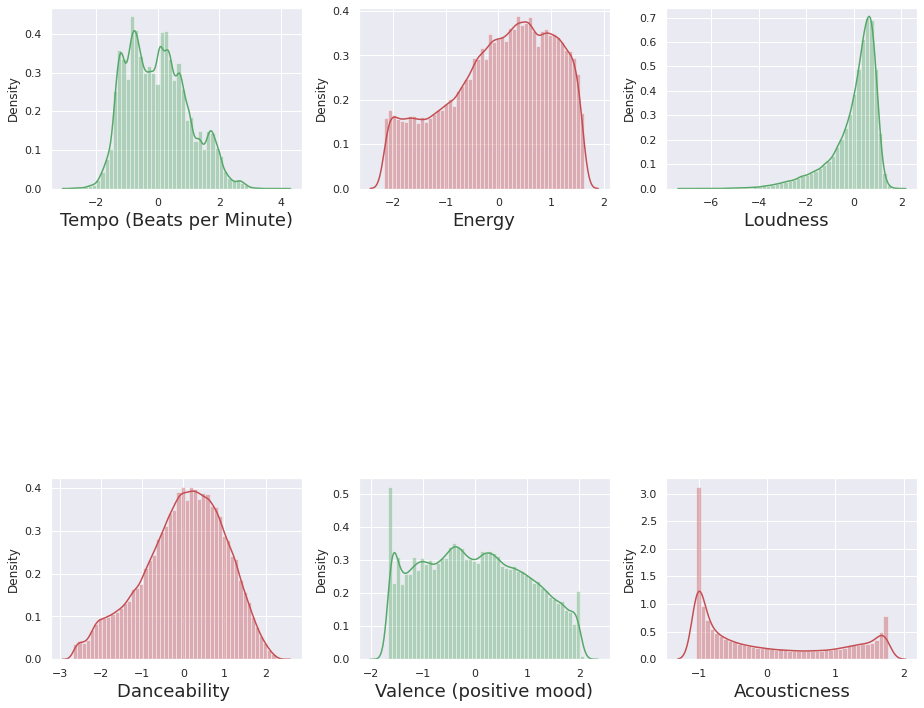

In [8]:
plt.figure(1, figsize=(13, 10),)

hfont = {'fontname':'Dejavu Sans'}

plt.subplot(331)
sns.distplot(scaled_df["tempo"],color = "g");
# plt.text(0, .010, r'$\mu=\ 121.12$', fontsize=22)
plt.xlabel('Tempo (Beats per Minute)', fontsize=18, **hfont)
plt.grid(True)


plt.subplot(332)
sns.distplot(scaled_df["energy"],color = "r");
# plt.text(-1.5, .020, r'$\mu=\ 52.05$', fontsize=22)
plt.xlabel('Energy', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(333)
sns.distplot(scaled_df["loudness"],color = "g");
# plt.text(-2, 0.10, r'$\mu=\ -9.36$', fontsize=22)
plt.xlabel('Loudness  ', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(337)
sns.distplot(scaled_df["danceability"],color = "r");
# plt.text(-1, 0.02, r'$\mu=\ 47.38$', fontsize=22)
plt.xlabel('Danceability ', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(338)
sns.distplot(scaled_df["valence"],color = "g");
# plt.text(-0.5, 0.01, r'$\mu=\ 40.68$', fontsize=22)
plt.xlabel('Valence (positive mood)', fontsize=18, **hfont)
plt.grid(True)

plt.subplot(339)
sns.distplot(scaled_df["acousticness"],color = "r");
# plt.text(0.0, 0.02, r'$\mu=\ 40.46$', fontsize=22)
plt.xlabel('Acousticness', fontsize=18, **hfont)
plt.grid(True)

plt.tight_layout()
plt.show()

## ***Dimension Reduction***

---


Principal Component Analysis (PCA) is useful as it can help to identify the most important features or variables that contribute the most to the overall variability in the data. By reducing the number of features, it becomes easier to visualize and interpret the data and identify patterns and relationships between songs.It is a good rule of thumb to consider an 80% variance. If we plot our cumulative sum of variance for features we can see that if we select 5 components it gives us enough variance for the whole dataset. Our standarized data has been used for pcs which will return the variance of 9 features.

In [9]:
pca = PCA()
pca.fit(scaled_df)
evr = pca.explained_variance_ratio_
print(evr)

[0.38327333 0.1802741  0.12021234 0.09334479 0.07726131 0.05811445
 0.0439219  0.03075956 0.01283823]


**If we plot our cumulative sum of variance for features we can see that if we select 5 components it gives us enough variance for the whole dataste.**

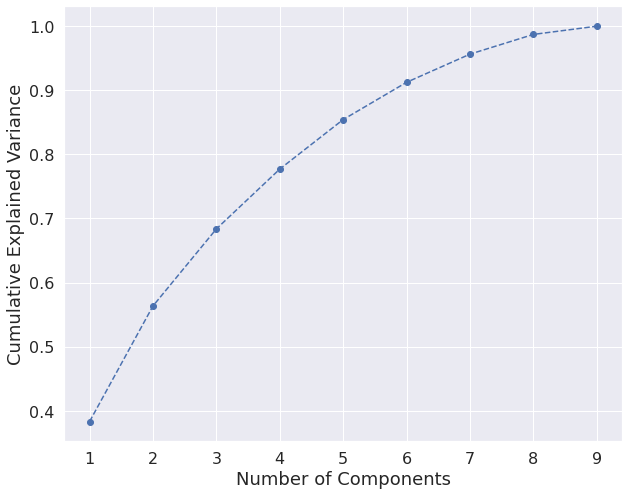

In [10]:
fig = plt.figure(figsize=(10,8))
plt.plot(range(1, len(sample_input_df.columns)+1), evr.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components', fontsize=18)
plt.ylabel('Cumulative Explained Variance',fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig = plt.savefig("/content/drive/MyDrive/cumulative_variance_plot.png")
plt.show()

**Our desire component number is 5 if we consider 80% variance of features data.**

In [11]:
for i, exp_var in enumerate(evr.cumsum()):
    if exp_var >= 0.8:
        comps = i + 1
        break
print("Number of components:", comps)
pca = PCA(n_components=comps)
pca.fit(scaled_df)
pca_df = pca.transform(scaled_df)

Number of components: 5


**For better visualization, dataset is plotted in 3D by using 3 components only even thought our opmial number of components shoulld be 5.**

[[ 0.42236063 -0.34055041 -0.4650475   0.33293435 -0.05587491 -0.47647423
  -0.05412417 -0.16189971 -0.34529962]
 [ 0.22672643  0.03311597  0.04823947 -0.17299423  0.64210497 -0.06246527
   0.67551049 -0.20623622 -0.01399662]
 [-0.19798758 -0.57151083  0.26643064  0.11235442  0.27692817  0.1414239
   0.00674343  0.52845583 -0.41781158]]
[0.38327333 0.1802741  0.12021234]


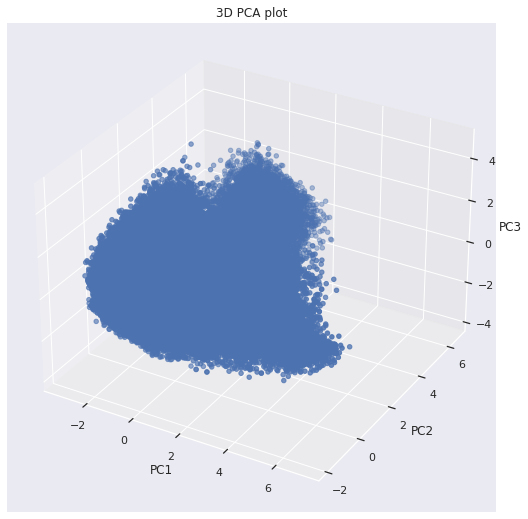

In [12]:
#perform PCA
#n Components = n Dimensions
pca = PCA(n_components=3)
principalComponents = pca.fit_transform(scaled_df) 
Viz_df = pd.DataFrame(data = principalComponents, columns = ['pc_1', 'pc_2', 'pc_3'])

print(pca.components_)
print(pca.explained_variance_ratio_)

fig = plt.figure(figsize=(14,9))
ax = fig.add_subplot(111, projection = '3d')

ax.scatter(Viz_df['pc_1'], 
        Viz_df['pc_2'], 
        Viz_df['pc_3'])
 
ax.set_xlabel("PC1", 
              fontsize=12)
ax.set_ylabel("PC2", 
              fontsize=12)
ax.set_zlabel("PC3", 
              fontsize=12)

plt.title("3D PCA plot")
plt.show()

## **Optimal Cluster Number**

---
In order to implement k-means clustering, we must select a number of clusters, k, which distinctly splits the data. We want this code to be reproducible, we must use an algorithmic approach to determine the optimal value for k. There are actually numerous algorithmic approaches, including but not limited to the elbow method, the silhouette method, and the gap statistic. Let’s take a closer look into the elbow method, which is arguably the most popular technique.

The inertia_ function in Python is an attribute of the KMeans clustering algorithm. This function returns a single value that represents the sum of squared distances for all clusters. The lower the value of inertia_, the better the clustering algorithm has performed, indicating that the data points are tightly clustered around their respective centroids. 

In following code we are determining how many clusters would be optimal to get minimum within-cluster sum of squares (WCSS).


In [14]:
from kneed import KneeLocator
import plotly.graph_objects as go
wcss = []
Mclusters = 11
for i in range(1, Mclusters):
    kmeans_pca = KMeans(i, init='k-means++', random_state=2022)
    kmeans_pca.fit(pca_df)
    wcss.append(kmeans_pca.inertia_)
n_clusters = KneeLocator([i for i in range(1, Mclusters)], wcss, curve='convex', direction='decreasing').knee
print("Optimal number of clusters", n_clusters)

Optimal number of clusters 3


**Our optimal number of cluster is 3. Plot the WCSS curve according to the number of clusters k.**

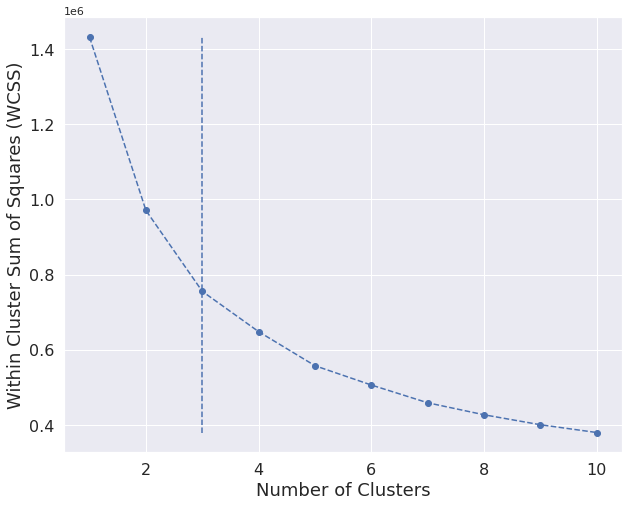

In [15]:
fig = plt.figure(figsize=(10,8))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.vlines(KneeLocator([i for i in range(1, Mclusters)], wcss, curve='convex', direction='decreasing').knee, ymin=min(wcss), ymax=max(wcss), linestyles='dashed')
plt.xlabel('Number of Clusters', fontsize=18)
plt.ylabel('Within Cluster Sum of Squares (WCSS)', fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
fig.savefig("/content/drive/MyDrive/num_clusters.png")
plt.show()

## **Hopkins Statistic**

---



The Hopkins statistic is used to measure the cluster tendency of a dataset, which is the degree to which a dataset can be considered as having clusters that are distinct from each other. For clusterable datasets Hopkins statistic is close to 0, if computed using pyclustertend.hopkins() function from pyclustertend package. 

In order to get conventional hopkins score, hopkins score has veen calculated by substracting from 1. Thus, more scor towards to 1 means better clusterability.

In [16]:
hopkins_sum = 0

for i in range(5):
    """pyclustertend.hopkins() -> Assess the clusterability of a dataset. A score between 0 and 1, 
    a score tending to 0 express a high cluster tendency."""
    hopkins_sum = hopkins_sum + hopkins(pca_df, pca_df.shape[0])

hopkins_score = 1 - hopkins_sum/5

print(hopkins_score) # more means better clusterability

0.9368458492348333


**Our hopkins score is greater than 90% and near to 1, from which we can conclude our dataset can be clustered finely!**

## **Silhouette Score**

---
The silhouette score is a metric used to evaluate the quality of clustering in unsupervised machine learning. It measures how well each data point fits into its assigned cluster based on both its similarity to other data points within the same cluster and its dissimilarity to data points in other clusters.

To calculate the silhouette score for a single data point, we first calculate the mean distance between the point and all other points in its cluster (intra-cluster distance). We then calculate the mean distance between the point and all other points in the nearest neighboring cluster (inter-cluster distance). The silhouette score for the point is then calculated as (inter-cluster distance - intra-cluster distance) divided by the maximum of the two values.

The overall silhouette score for a clustering solution is the mean silhouette score of all data points in the dataset. A higher silhouette score indicates that the clustering is well-separated and the data points are more clearly assigned to their respective clusters.

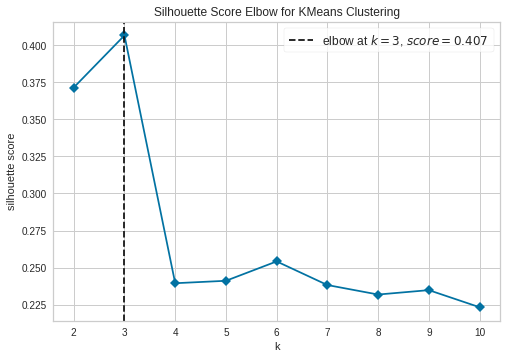

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [18]:
# Elbow Method for K means with Silhouette Score
# k is range of number of clusters.
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
visualizer = KElbowVisualizer(KMeans(random_state=2022), k=(2,11), metric='silhouette', timings=False)
visualizer.fit(pca_df) # Fit data to visualizer
visualizer.show() 

**The silhouette score showing us 3 clusters giving us highest score.**

## **Visualization**

---



The InterclusterDistance visualizer helps to interpret the clustered data situation by showing the distances between the centroids of different clusters.By analyzing the distances between the centroids, we can determine whether the clusters are well-separated or overlapping. If the distances between the centroids are large, it suggests that the clusters are well-separated and distinct from each other. On the other hand, if the distances between the centroids are small, it suggests that the clusters may be overlapping or poorly separated. Here we can see the 3 centroid are well seperated frorm each other.

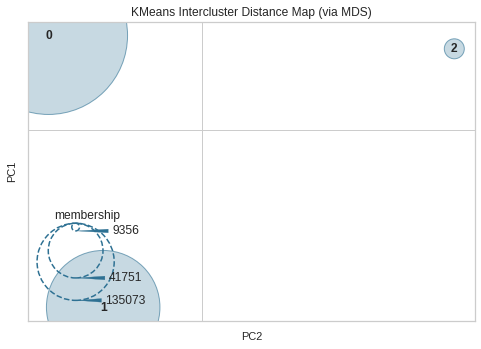

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [19]:
model = KMeans(3,random_state=2022)
visualizer = InterclusterDistance(model, random_state=2022)
Viz_pca_df = pd.DataFrame(pca_df) # Convert the NumPy array to a pandas DataFrame
visualizer.fit(Viz_pca_df.iloc[:,:3])        # Fit the data to the visualizer
visualizer.show()  

## **Distortion Score**

---

Distortion score is a measure of how well a clustering algorithm performs. It is calculated as the sum of the squared distances between each data point and its assigned cluster center.

In k-means clustering, the goal is to minimize the distortion score by finding the optimal cluster centers. The optimal cluster centers are the ones that minimize the sum of squared distances between each data point and its assigned cluster center.

Distortion score can be used as a way to evaluate the quality of a clustering algorithm. A lower distortion score indicates that the algorithm is better at grouping similar data points together and separating dissimilar ones. However, it's important to note that the distortion score is not always the best measure of clustering performance, as it can be affected by outliers and noise in the data. In some cases, other measures such as silhouette score or entropy may be more appropriate.

Even though distortion score showing us to select 5 cluster but we are going considering silhouette score over distortion score here.

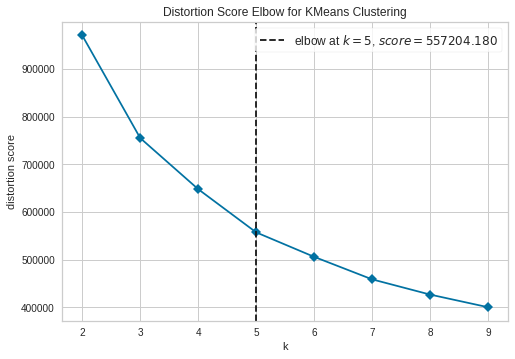

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [20]:
# Elbow Method for K means
# k is range of number of clusters.
visualizer = KElbowVisualizer(KMeans(random_state=2022), k=(2,10), timings=False)
visualizer.fit(pca_df) # Fit data to visualizer
visualizer.show() 

## **Labeling**

---


By now as we have an optimal number of clusters and PCA, we can go forward with analyzing our songs. To get to know which songs belong to which cluster we have to label each song according to its cluster number. Then we will extract the information about each cluster to know better about each song's features. We can make some bar charts, plotting a particular feature for each track in a given cluster in order to see if this feature is, indeed, characteristically high with respect to the average feature value in the entire dataset.


In [21]:
kmeans_pca = KMeans(n_clusters=n_clusters, init='k-means++', random_state=2022)
kmeans_pca.fit(pca_df);

In [22]:
Cluster_pca_kmeans = pd.concat([sample_input_df.reset_index(drop=True), pd.DataFrame(pca_df)], axis=1)
Cluster_pca_kmeans.columns.values[(-1*comps):] = ["Component " + str(i+1) for i in range(comps)]
Cluster_pca_kmeans['Cluster'] = kmeans_pca.labels_
Cluster_pca_kmeans.head()

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,Component 1,Component 2,Component 3,Component 4,Component 5,Cluster
0,0.896,0.648,0.179,0.000,0.2090,-22.278,0.9120,91.973,0.569,1.746383,3.529700,-1.936092,1.498455,-0.404965,2
1,0.163,0.705,0.405,0.000,0.1380,-11.284,0.0509,76.175,0.471,-0.018068,-0.260381,-1.458028,-0.876338,-0.400523,0
2,0.689,0.790,0.642,0.248,0.0779,-9.359,0.0825,67.503,0.943,-0.419918,-0.074236,-2.626146,-0.205408,0.963484,0
3,0.910,0.399,0.833,0.000,0.7190,-13.307,0.9470,82.801,0.200,0.738068,5.380040,0.845423,-0.415990,-0.049294,2
4,0.938,0.710,0.379,0.559,0.0850,-11.897,0.0407,93.145,0.957,0.888624,-0.430197,-2.304643,0.841163,1.500555,0


### **Visualization**
To visualize our data in their respective clusters, we plotted them in 2D plot. From the plots we can see clusters are pretty well separated from each other. But, we have to remmember that this is 2D plot of 5 dimensional pcs dataset. So, we cant definitively state any statement about features of a specific cluster.

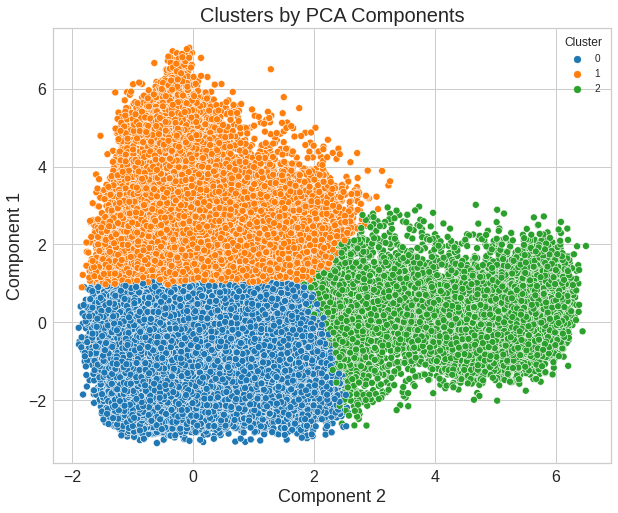

In [23]:
x = Cluster_pca_kmeans['Component 2']
y = Cluster_pca_kmeans['Component 1']
fig = plt.figure(figsize=(10, 8))
sns.scatterplot(x, y, hue=Cluster_pca_kmeans['Cluster'], palette = ['tab:blue', 'tab:orange', 'tab:green'])
plt.title('Clusters by PCA Components', fontsize=20)
plt.xlabel("Component 2", fontsize=18)
plt.ylabel("Component 1", fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()
fig.savefig("/content/drive/MyDrive/clusters-2d.png")

# **Analyzing Clusters**
To get further details of each of our clusters, we can measure features for each cluster. In order to get the real value of features now we have to take the clean dataframe in account as the "Cluster_pca_kmeans" dataset is standarized. Also we have to add "cluster" column from "Cluster_pca_kmeans" dataset. As their index isn't same so we have to set it to the same index first and then copied the column from "Cluster_pca_kmeans" dataset and paste it to sample_input_df dataset.

In [24]:
Cluster_pca_kmeans.index = sample_input_df.index
sample_input_df['Cluster'] = Cluster_pca_kmeans['Cluster']
sample_input_df

,acousticness,danceability,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence,Cluster
track_id,,,,,,,,,,
Un jour Hélène était à la fenêtre-1VKHb8X8Wga1sxB9oUOZlJ,0.8960,0.648,0.179,0.00000,0.2090,-22.278,0.9120,91.973,0.569,2
Hard Times-3N9JosNqH6P92MNaUNpOEd,0.1630,0.705,0.405,0.00000,0.1380,-11.284,0.0509,76.175,0.471,0
I'm The Map!-7MuRC4kkJQYqWRRmJzr4ki,0.6890,0.790,0.642,0.24800,0.0779,-9.359,0.0825,67.503,0.943,0
Dicks Pt. 2 (Real Dad)-6X6nd74yAbFemPfTr7FhFR,0.9100,0.399,0.833,0.00000,0.7190,-13.307,0.9470,82.801,0.200,2
Snow White and the seven Dwarfs: Whistle while you work-5sbjC2B06kn5MqWmsyimtb,0.9380,0.710,0.379,0.55900,0.0850,-11.897,0.0407,93.145,0.957,0
...,...,...,...,...,...,...,...,...,...,...
"Suite No. 5 in C Minor, BWV 1011: I. Prélude-54UjDEMD8xy7mhKu00d4YC",0.9740,0.359,0.108,0.87100,0.0765,-21.657,0.0515,100.112,0.370,1
Beer and Friends-3sXWJsqDKROm7E3rdB9r2Y,0.0957,0.561,0.696,0.00131,0.2170,-11.755,0.0522,120.049,0.163,0
Mezzanine-4IfHYniNBoAATWV6iLEXRs,0.0556,0.648,0.586,0.75000,0.1330,-11.660,0.0284,98.015,0.394,0


From the barcharts, we can observe some features for each cluster. For an example, cluster 0 has high acousticness, low intrumentalness.

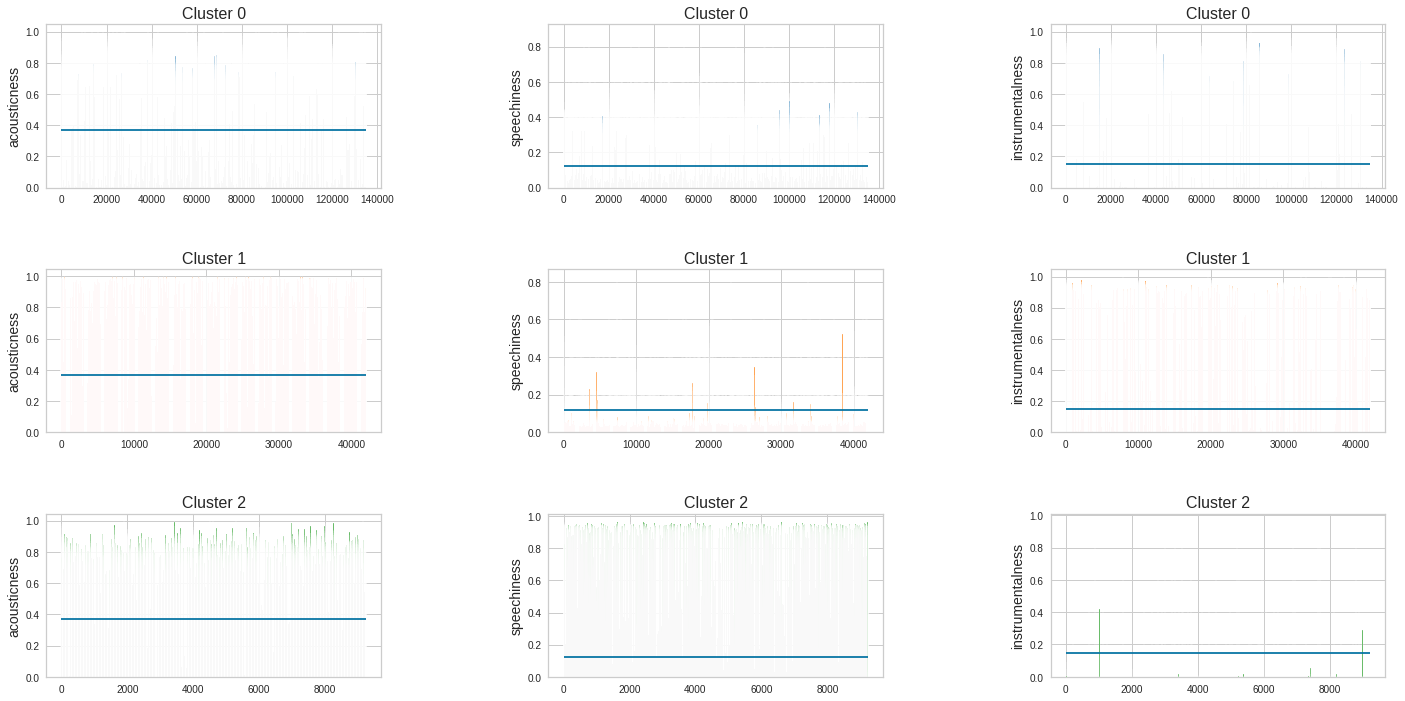

In [25]:
sample_input_df['Cluster'] = Cluster_pca_kmeans['Cluster']
clusters = [0, 1, 2]
features = ["acousticness", "speechiness", "instrumentalness"]
colors = ['tab:blue', 'tab:orange', 'tab:green']
dim = len(clusters)
dimf = len(features)

fig, axes = plt.subplots(dim, dim, figsize=(24, 12))
i = 0
test_cluster = sample_input_df.loc[sample_input_df['Cluster'] == clusters[0]]
for ax in (axes.flatten()):
    if i % dim == 0 and i != 0:
        test_cluster = sample_input_df.loc[sample_input_df['Cluster'] == clusters[i // dim]]
    col = features[i % dim]
    y = test_cluster[col]
    x = [i for i in range(len(y))]
    ax.bar(x, y, color=colors[i//dim])
    ax.set_ylabel(col, fontsize=14)
    ax.set_title("Cluster " + str(clusters[i // dim]), fontsize=16)
    ax.hlines(np.mean(sample_input_df[col]), 0, len(y))
    plt.subplots_adjust(wspace=.5, hspace=.5)
    i += 1
    
fig.savefig("/content/drive/MyDrive/cluster_feature_bar_charts_dim_3.png")

## **Findings**

---

Evaluating the clusters and features of interest, we find following findings:


*   Cluster 0 has mostly above average accousticness but low speechiness
*   Cluster 1 is characterized extremely high accousticness and instrumentalness scores, relative to the average for the full dataset.
*   Cluster 2 has extremly low intrumentalness but high speechiness.

From the audio feature defnition: 

*   Acousticness refers to the degree to which a song is acoustic, meaning it features instruments that are not electronically amplified 
*   Speechiness refers to the degree to which a song features spoken words, such as rap or spoken word poetry
*   Instrumentalness, on the other hand, refers to the degree to which a song contains no vocals. 

So we can suggest, if someone likes rap song but with low amplification he/she can go for songs which belong to cluster 2.


## **Concluion**

---


In conclusion, the project "Categorizing Music with PCA and K-Means Clustering" demonstrated the usefulness of dimensionality reduction and clustering techniques in analyzing and categorizing music based on its audio features. Through the use of PCA, we were able to reduce the dimensionality of the feature space and identify the most important features that explain the variance in the data. Then, by applying k-means clustering on the reduced feature space, we were able to group similar songs together into distinct categories based on their audio features.

This project highlights the potential of machine learning algorithms and data analysis techniques to provide valuable insights into the musical characteristics of songs and to aid in music categorization and recommendation systems. Further research in this area could lead to the development of more accurate and personalized music recommendation systems that take into account not only user preferences but also the musical characteristics of the songs.

Through this project we can see how clustered can save us a lot of time for selecting a song of our choice. now based on our choice of features we can select a song faster! 